# **Laboratorio 2**

- Derek Arreaga - 22537
- Mónica Salvatierra - 22249

In [13]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

Descargar dataset de MNIST y generar los conjuntos de entrenamiento y prueba

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()


print("Entrenamiento:", x_train.shape, y_train.shape)
print("Prueba:", x_test.shape, y_test.shape)

Entrenamiento: (60000, 28, 28) (60000,)
Prueba: (10000, 28, 28) (10000,)


Normalizar los valores de píxel a rango [0, 1]

In [ ]:

x_train = x_train / 255.0
x_test = x_test / 255.0


Revisar que el rango de los valores de cada pixel estén normaizados

In [4]:
print("Min pixel value:", x_train.min())
print("Max pixel value:", x_train.max())


Min pixel value: 0.0
Max pixel value: 1.0


## **Preprocesamiento de datos**

Crear un conjunto de validación a partir del conjunto de entrenamiento

In [5]:
from sklearn.model_selection import train_test_split

# Dividir x_train en 80% entrenamiento y 20% validación
x_train_new, x_val, y_train_new, y_val = train_test_split(
    x_train, y_train, test_size=0.2, random_state=42)

print("x_train:", x_train_new.shape)
print("x_val:", x_val.shape)
print("x_test:", x_test.shape)


x_train: (48000, 28, 28)
x_val: (12000, 28, 28)
x_test: (10000, 28, 28)


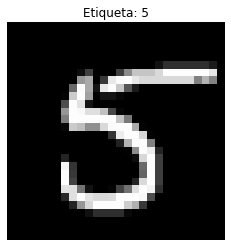

In [22]:
plt.imshow(x_train_new[0], cmap='gray')
plt.title(f"Etiqueta: {y_train_new[0]}")
plt.axis('off')
plt.show()

## **1. Modificación del Ancho de la Red**

Entrenar modelo base de red neuronal (una capa oculta con 128 neuronas)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8078 - loss: 0.6886 - val_accuracy: 0.9359 - val_loss: 0.2311
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9432 - loss: 0.2002 - val_accuracy: 0.9541 - val_loss: 0.1616
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9623 - loss: 0.1349 - val_accuracy: 0.9602 - val_loss: 0.1347
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9702 - loss: 0.1084 - val_accuracy: 0.9598 - val_loss: 0.1289
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9746 - loss: 0.0909 - val_accuracy: 0.9690 - val_loss: 0.1054
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9792 - loss: 0.0740 - val_accuracy: 0.9715 - val_loss: 0.0960
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9838 - loss: 0.0610 - val_accuracy: 0.9718 - val_loss: 0.0914
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9868 - loss: 0.0507 - val_accuracy: 0.

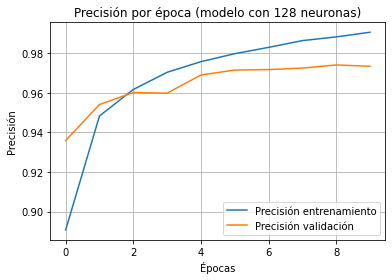

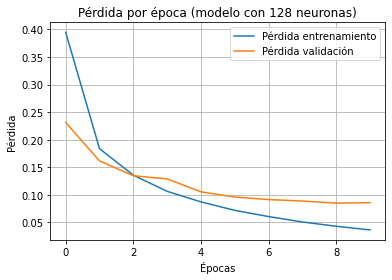

In [18]:
from tensorflow import keras
from tensorflow.keras import layers
import time

model = keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

start = time.time()

history = model.fit(
    x_train_new, y_train_new,
    validation_data=(x_val, y_val),
    epochs=10,
    batch_size = 128
)

end = time.time()
print("Tiempo total de entrenamiento:", round(end - start, 2), "segundos")

plt.plot(history.history['accuracy'], label='Precisión entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.title('Precisión por época (modelo con 128 neuronas)')
plt.legend()
plt.grid(True)
plt.show()

# Gráfico de pérdida 
plt.plot(history.history['loss'], label='Pérdida entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.title('Pérdida por época (modelo con 128 neuronas)')
plt.legend()
plt.grid(True)
plt.show()

In [19]:
val_acc = history.history['val_accuracy'][-1]
print("Precisión de validación final:", round(val_acc * 100, 2), "%")


Precisión de validación final: 97.34 %


Modifique el tamaño de la capa escondida a 200 neuronas

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8295 - loss: 0.6156 - val_accuracy: 0.9440 - val_loss: 0.2016
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9487 - loss: 0.1792 - val_accuracy: 0.9582 - val_loss: 0.1462
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9665 - loss: 0.1179 - val_accuracy: 0.9652 - val_loss: 0.1161
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9748 - loss: 0.0891 - val_accuracy: 0.9705 - val_loss: 0.1046
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9803 - loss: 0.0682 - val_accuracy: 0.9720 - val_loss: 0.0919
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9849 - loss: 0.0542 - val_accuracy: 0.9729 - val_loss: 0.0893
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9877 - loss: 0.0443 - val_accuracy: 0.9753 - val_loss: 0.0820
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9899 - loss: 0.0368 - val_accuracy: 0.

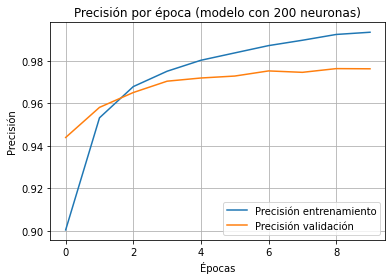

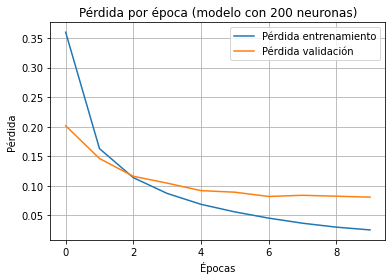

In [20]:
model = keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(200, activation='relu'),  
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

start = time.time()

history = model.fit(
    x_train_new, y_train_new,
    validation_data=(x_val, y_val),
    epochs=10,
    batch_size = 128
)

end = time.time()
tiempo = round(end - start, 2)

# Obtener precisión final en validación
val_acc = round(history.history['val_accuracy'][-1] * 100, 2)

print(f"\n Precisión de validación final: {val_acc}%")
print(f"Tiempo total de entrenamiento: {tiempo} segundos")

plt.plot(history.history['accuracy'], label='Precisión entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.title('Precisión por época (modelo con 200 neuronas)')
plt.legend()
plt.grid(True)
plt.show()

# Gráfico de pérdida 
plt.plot(history.history['loss'], label='Pérdida entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.title('Pérdida por época (modelo con 200 neuronas)')
plt.legend()
plt.grid(True)
plt.show()

**¿Cómo cambia la precisión de validación del modelo?**

- Entrenando el modelo con una capa oculta de 200 neuronas, 5 épocas, y un batch size de 128, el rendimiento fue ligeramente mayor al modelo base que ocupaba 128 neuronas en su capa oculta. Para el modelo base, se obtuvo un accuracy del 97.34%, mientras que en el nuevo modelo, el accuracy fue de 97.63%.

**¿Cuánto tiempo tarda el algoritmo en entrenar?**

- El modelo base tardó 10.5 segundos en entrenarse, mientras el nuevo modelo con más neuronas tardó 11.44 segundos. Hubo una diferencia de 0.94 segundos. 

Experimente con diferentes tamaños de capa escondida (50, 100, 300, 500) y determine
cuál ofrece el mejor rendimiento.

In [21]:

neuronas_ocultas = [50, 100,300, 500]

resultados = []

for n in neuronas_ocultas:
    print(f"\nEntrenando modelo con {n} neuronas en la capa oculta...")

    # Definir modelo
    model = keras.Sequential([
        layers.Flatten(input_shape=(28, 28)),
        layers.Dense(n, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])

    # Compilar
    model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

    start_time = time.time()

    history = model.fit(
        x_train_new, y_train_new,
        validation_data=(x_val, y_val),
        epochs=10,
        batch_size = 128,
        verbose=1
    )

    end_time = time.time()
    tiempo = round(end_time - start_time, 2)
    val_acc = round(history.history['val_accuracy'][-1] * 100, 2)

    resultados.append((n, val_acc, tiempo))
    print(f"→ Precisión de validación: {val_acc}% | Tiempo: {tiempo} segundos")


Entrenando modelo con 50 neuronas en la capa oculta...
Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7745 - loss: 0.8205 - val_accuracy: 0.9241 - val_loss: 0.2729
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9272 - loss: 0.2580 - val_accuracy: 0.9375 - val_loss: 0.2187
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9428 - loss: 0.2006 - val_accuracy: 0.9473 - val_loss: 0.1842
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9520 - loss: 0.1664 - val_accuracy: 0.9528 - val_loss: 0.1646
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9601 - loss: 0.1455 - val_accuracy: 0.9557 - val_loss: 0.1494
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9655 - loss: 0.1236 - val_accuracy: 0.9596 - val_loss: 0.1340
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9706 - loss: 0.1050 - val_accuracy: 0.9634 - val_loss: 0.1275
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/s

La configuración que tuvo el mejor rendimiento fue el que contiene 300 neuronas en la capa oculta con un rendimiento de 97.79% y un tiempo de ejecución de 12.93 segundos.

## **2. Modificación de la Profundidad de la Red**

Agregue una capa escondida adicional al modelo

In [29]:


model = keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),       # Primera capa oculta
    layers.Dense(64, activation='relu'),        # Segunda capa oculta 
    layers.Dense(10, activation='softmax')      # Capa de salida
])

model.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

start = time.time()

history = model.fit(
    x_train_new, y_train_new,
    validation_data=(x_val, y_val),
    epochs=10,
    batch_size = 128
)

end = time.time()
tiempo = round(end - start, 2)
val_acc = round(history.history['val_accuracy'][-1] * 100, 2)

print(f"\nPrecisión validación final: {val_acc}%")
print(f"Tiempo total de entrenamiento: {tiempo} segundos")

for i, layer in enumerate(model.layers):
    weights = layer.get_weights()
    if weights:
        w_shape = weights[0].shape
        b_shape = weights[1].shape
        print(f"Capa {i} - Pesos: {w_shape}, Sesgos: {b_shape}")

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8172 - loss: 0.6691 - val_accuracy: 0.9465 - val_loss: 0.1896
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9518 - loss: 0.1687 - val_accuracy: 0.9599 - val_loss: 0.1382
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9665 - loss: 0.1109 - val_accuracy: 0.9660 - val_loss: 0.1168
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9761 - loss: 0.0837 - val_accuracy: 0.9682 - val_loss: 0.1059
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9807 - loss: 0.0646 - val_accuracy: 0.9715 - val_loss: 0.0941
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9850 - loss: 0.0502 - val_accuracy: 0.9698 - val_loss: 0.0985
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9877 - loss: 0.0403 - val_accuracy: 0.9746 - val_loss: 0.0906
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9910 - loss: 0.0337 - val_accuracy: 0.

**Cambios al código**
<br>
Se agregó una segunda capa con 64 neuronas (64, activation='relu') entre la primera capa oculta y la de salida. Esto aumentó la profundidad de la red y el número total de parámetros. Se utilizó la misma función de activación (ReLU). Se mantuvo el optimizador y el número de épocas constantes para comparar bajo las mismas condiciones.

**Comparación sobre el modelo original**
<br>
Tomando en cuenta que ambos se entrenaron con 10 épocas y un batch size de 128, tuvo un tiempo de entrenamiento levemente mayor. Mientras el modelo de 128 neuronas tuvo un tiempo de entrenamiento de 10.5 segundos, este nuevo modelo con una capa oculta adicional tomó 11.57 segundos en entrenarse. Además, este nuevo modelo demostró tener una mejor precisión que el modelo original, con un 97.53%, mientras que el modelo original obtuvo una precisión final de 97.34%

## **3. Redes Profundas**

In [ ]:
arquitecturas = [
    [128, 64],                      # 2 capas
    [256, 128, 64],                 # 3 capas
    [256, 128, 64, 32],             # 4 capas
    [512, 256, 128, 64, 32]         # 5 capas
]

for i, capa_oculta in enumerate(arquitecturas, start=2):
    print("=" * 60)
    print(f" Arquitectura con {i} capas ocultas: {capa_oculta}")


    model = keras.Sequential()
    model.add(layers.Flatten(input_shape=(28, 28)))

    for units in capa_oculta:
        model.add(layers.Dense(units, activation='relu'))

    model.add(layers.Dense(10, activation='softmax'))

    model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

    start = time.time()

    history = model.fit(
        x_train_new, y_train_new,
        validation_data=(x_val, y_val),
        epochs=10,
        batch_size = 128,
        verbose=1  
    )

    end = time.time()
    tiempo = round(end - start, 2)
    val_acc = round(history.history['val_accuracy'][-1] * 100, 2)

    print(f" Precisión de validación final: {val_acc}%")
    print(f" Tiempo total de entrenamiento: {tiempo} segundos")

 Arquitectura con 2 capas ocultas: [128, 64]
Epoch 1/10


C:\Users\Ale\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7995 - loss: 0.7046 - val_accuracy: 0.9472 - val_loss: 0.1802
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9542 - loss: 0.1633 - val_accuracy: 0.9592 - val_loss: 0.1383
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9672 - loss: 0.1086 - val_accuracy: 0.9627 - val_loss: 0.1233
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9746 - loss: 0.0846 - val_accuracy: 0.9689 - val_loss: 0.1007
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9806 - loss: 0.0643 - val_accuracy: 0.9699 - val_loss: 0.0974
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9853 - loss: 0.0496 - val_accuracy: 0.9718 - val_loss: 0.0908
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9880 - loss: 0.0402 - val_accuracy: 0.9722 - val_loss: 0.0964
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9893 - loss: 0.0348 - val_accuracy: 0.9757 - val_